# RFM Segmentation and K-Means Clustering for Grocery Shopping Data



1.Data Understanding: useful as a preliminary step to capture basic data property. Distribution analysis, statistical exploration, correlation analysis, suitable transformation of variables and elimination of redundant variables, data visualisation, management of missing values. Load the data set to SQLITE.                        

•	Distribution analysis    		                       
•	Statistical exploration 	              
•	Suitable transformation of variables                        
•	Data visualisation                                     
•	Load the data to SQL       

In [ ]:
import pandas as pd

In [ ]:
#load the dataset

grocery_data = pd.read_csv('/content/Groceries_dataset.csv')

In [ ]:
# displaying the content of the dataset
grocery_data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


After loading the dataset, we can see that this dataset contains the following columns:


*   Member_number -> the ide of the member who made the purchase
*   Date -> the date on which the purchas was made
*   itemDescription -> the name of the item purchased




Below I am going to perform a **distribution analysis** to get a sense of the frequencce of purchases per member and per item. Then I will look into **summary statistics** for the dataset and if necessary, i might need to **transform variables** such as converting Date fromm string to datetime.
It is important to visualise the **data visualisation** to visually inspect distributions, trends and patterns.  And of course, it is important to **check for missing values** and if so, decide how to handle them.

In [ ]:
# Distribution Analysis
member_purchase_count = grocery_data['Member_number'].value_counts()
item_purchase_count = grocery_data['itemDescription'].value_counts()
print("Member Purchase Count:")
print(member_purchase_count)
print("\nItem Purchase Count:")
print(item_purchase_count)

Member Purchase Count:
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64

Item Purchase Count:
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


In [ ]:
# Statistical Exploration
dataset_description = grocery_data.describe(include='all')
dataset_description

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


In [ ]:
# Checking for missing values
missing_values = grocery_data.isnull().sum()
missing_values

Member_number      0
Date               0
itemDescription    0
dtype: int64

From the *distribution analysis* and *statistical explortion* those are the insights given:



1.   member purchase count varies with the most active member having made 36 purchases and some members having made only 2 purchases withing the time frame.
2.   item purchase count varies with 'milk' as the most purchased item and 'kitchen utensil' and 'presevation products' as the least purchased items.
3.  dataset description clearly sows that there are 38765 entries in the dataset, where 3898 are unique member numbers. Purchases were made over 728 unique dates and there are 167 unique item descriptions The most common date is January 21. 2015, with 96 occurencies on that day. The mean member number is arount 3004, with a standard deviation of 1154, indicating that members are fairly evely distributed accross the range.   
4. There are no missing values in the dataset, but there are some undefined values.

Before continuing with data visualisation for better understanding, I am going to **transform** the Date colum nfrom string to datatime object to enable time-based analysis.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# convert date from string to datetime object
grocery_data['Date'] = pd.to_datetime(grocery_data['Date'], format='%d-%m-%Y')

In [ ]:
# chooosing a colomap
colormap = plt.cm.viridis

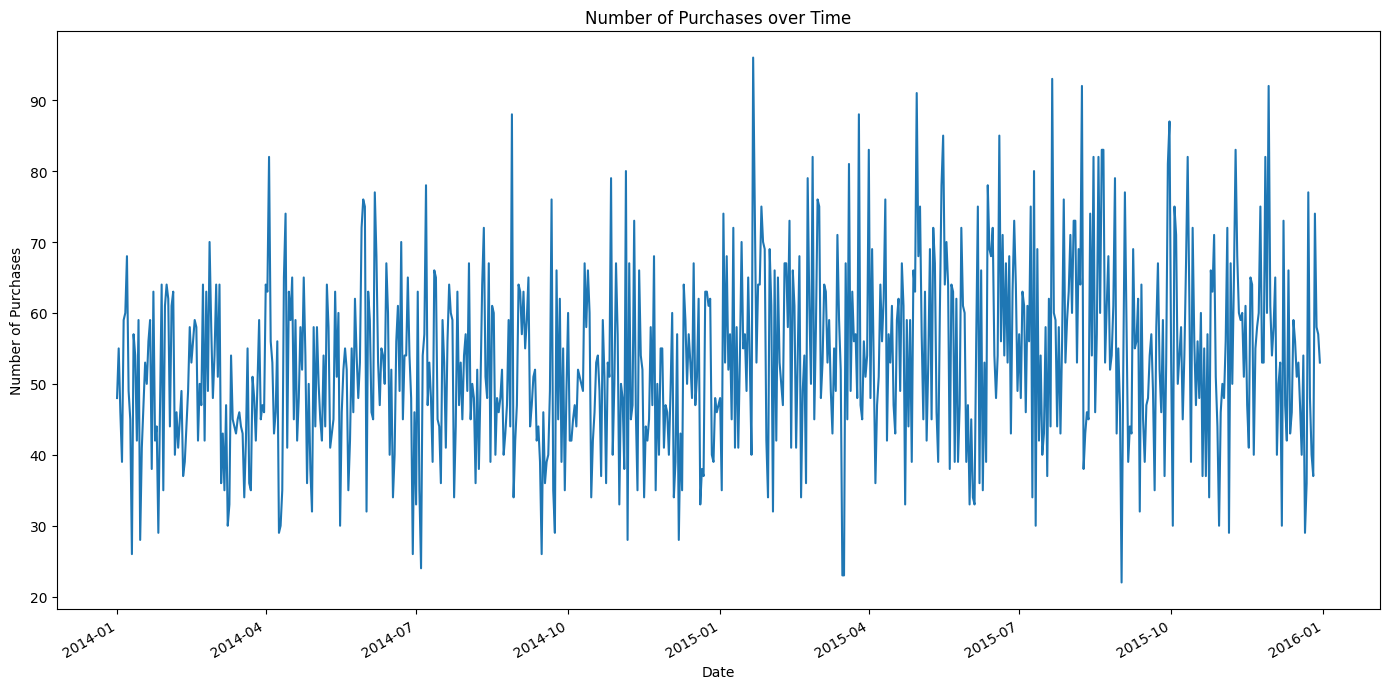

In [ ]:
# visualising the number of purchases over time
plt.figure(figsize=(14,7))
grocery_data['Date'].value_counts().sort_index().plot()
plt.title('Number of Purchases over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

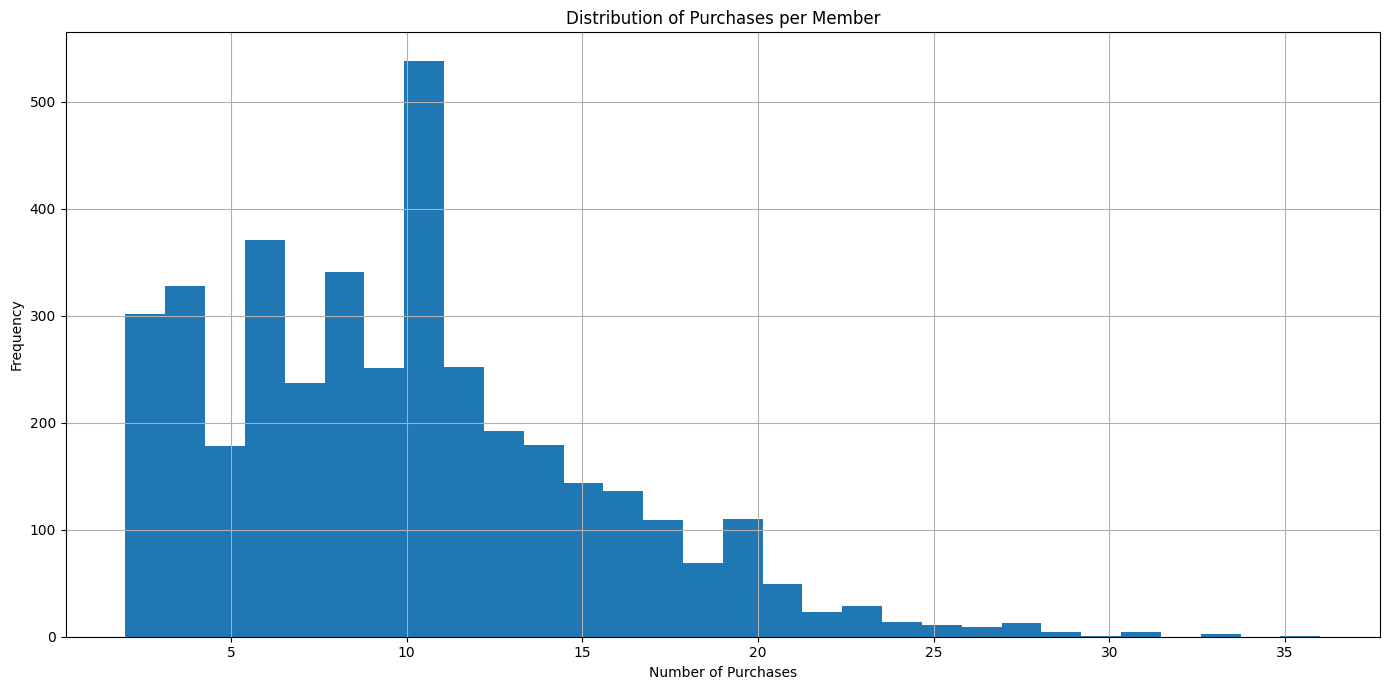

In [ ]:
# visualising the distribution of purchases per member
plt.figure(figsize=(14, 7))
member_purchase_count.hist(bins=30)
plt.title('Distribution of Purchases per Member')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

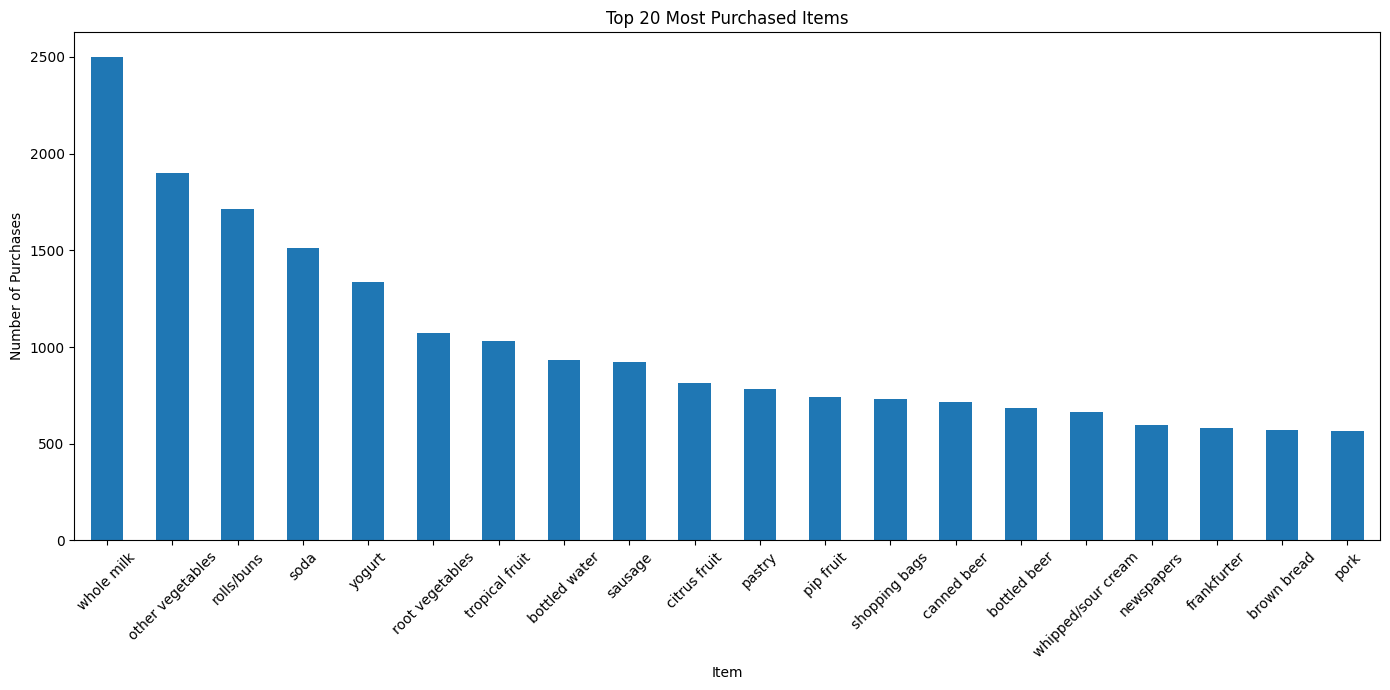

In [ ]:
# visualising the distribution of purchases per item (top 20 items)
plt.figure(figsize=(14, 7))
item_purchase_count.head(20).plot(kind='bar')
plt.title('Top 20 Most Purchased Items')
plt.xlabel('Item')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the visualisations above those are the insights provided:
1.  The time series graph shos fluctuations in the number of purchases over time over the available period. There doesnt appear to be a clear trend or seasonality from the graph, but there are peaks and troughs which could correspond to specific events or days of the week.
2.  The histogram indicates that the majority of members make a small number of purchases, with a long tail indicating that a few members make a lot of purchases. This kind of distribution is commmon in retail and customer purchase data.
3.  The bar graph of the top 20 items shows 'whole milk' as the most frequently purchased item, followed by 'other vegetables' and 'rolls/buns'. These items are staple in many households, which likely explains their frequency.



Now, it is obvious that we have a good understanding of the datset and the next step is to load the data into a SQLite database.

Below i am going to:
1. create a SQLite database.
2. load the data into the database.
3. perform any additional cleanup necessary using SQL queries.*italicized text*

In [ ]:
import sqlite3

# creating a SQLite database in memory
conn = sqlite3.connect(':memory:')

#writing the data to a sqlite table
grocery_data.to_sql('grocery', conn, index=False, if_exists='replace')

#verifying the content by querying the database
pd.read_sql('select * from grocery limit 5', conn)

,Member_number,Date,itemDescription
0,1808,2015-07-21 00:00:00,tropical fruit
1,2552,2015-01-05 00:00:00,whole milk
2,2300,2015-09-19 00:00:00,pip fruit
3,1187,2015-12-12 00:00:00,other vegetables
4,3037,2015-02-01 00:00:00,whole milk


2. Perform RFM sgmentation in SQL.
The first step is to build a RFM model to assig Recency, Frequency and Monetary valye to each member via a SQL query.

RFM is important to understand the customer behaviour. It is clear from the datset that the Monetary value is not included.

RFM metrics based on the available data:
1. Recency (R): How recently a customer has made a purchase. This can be calculated as the number of days since a customer's last purchase.
2. Frequency (F): How often a customer makes a purchase. This can be calculated as the numbr of distinct purchase dates for each memmber abd this reflect how often a member shops, regardless if how many items they purchase on each visit.
3. Monetary (M): Monetary value will be calculated by counting the number of distinct items a member has purchased. this serves as a proxy for the amount of money a memmber spends under the assumption that purchasing a greater variety of items may correlate with higher spending.


In [ ]:
# defining, xecuting and validating RFM metrics for SQL query to do RFM segmentation.

rfm_query = '''
SELECT
  Member_number,
  julianday((SELECT MAX(Date) FROM grocery)) - julianday(MAX(Date)) AS Recency,
  COUNT(DISTINCT Date) AS Frequency,
  COUNT(DISTINCT itemDescription) AS Monetary
FROM
  grocery
GROUP BY
  Member_number
'''

rfm_data = pd.read_sql_query(rfm_query, conn)

rfm_data.head()


,Member_number,Recency,Frequency,Monetary
0,1000,35.0,5,11
1,1001,242.0,5,9
2,1002,122.0,4,8
3,1003,323.0,4,6
4,1004,28.0,8,16


**3. Segmentation with K-Means: **

Now that we have the RFM metrics calculated for each customer the next steps will involve using these metrics to segment the customers.This will be done using segmentation with K-Means.


The steps i am going to follow:
1. Standartise the RFM data: the RFM variables are usually on different scales and distributions, so it is important to standartise them to have a mean of 0 and standard deiation of 1 before using K-Means clustering.
2. Choose the number of clusters K. the elbow method will be used to determine the optimal value of K.
3. Run K-Means culatering: here i am going to apply the k-means algorithm ti the standartised RFM data to segment custmers into k-distinct clusters.
4. Analyse cluster characteristics in order to understand different segments of the customers base.
5. Visualise the clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Standartise the RFM data

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

In [ ]:
# Determining the optimal number of K using the elbow method
sse = {}
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(rfm_scaled)
  sse[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

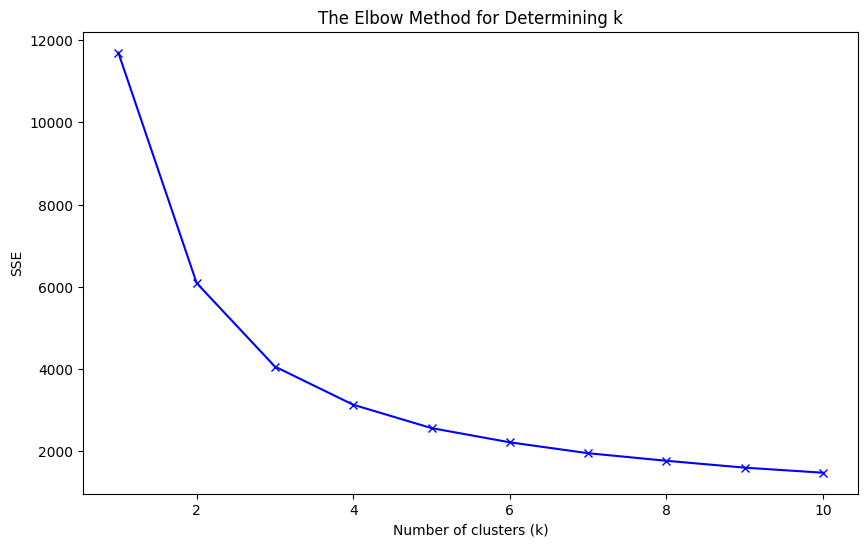

In [ ]:
# plot the sse for each k
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The Elbow Method for Determining k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


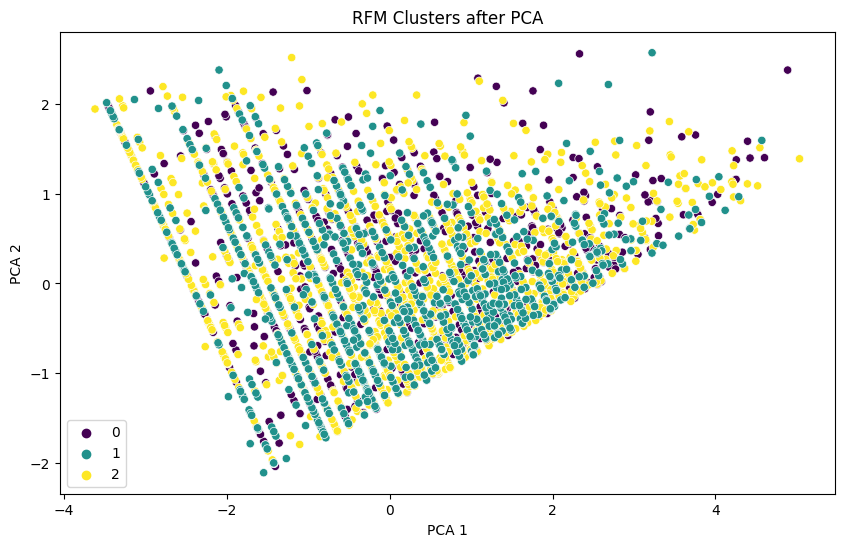

,Recency,Frequency,Monetary
0,107.833597,5.980190,13.889857
1,420.480132,2.197572,4.913907
2,124.057225,3.135838,7.390173


In [ ]:
from sklearn.decomposition import PCA

# fitting the final model with k=3 from the elbow method
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(rfm_scaled)

#assigning the clusters to the original RFM dataframe
rfm_data['Cluster'] = kmeans.labels_

# analysing  the centroids of the clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Recency', 'Frequency', 'Monetary'])

# analysig  the clusters by assigning the cluster centers to the RFM DataFrame
rfm_data['Cluster'] = kmeans.labels_
rfm_data = rfm_data.merge(cluster_centers.rename(columns=lambda x: x + "_center"), left_on='Cluster', right_index=True)

# visualising  the Results using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
rfm_pca = pca.fit_transform(rfm_scaled)
rfm_data['pca_x'] = rfm_pca[:, 0]
rfm_data['pca_y'] = rfm_pca[:, 1]

# plotting  the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=rfm_data, palette='viridis')
plt.title('RFM Clusters after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# showing  the centroids of the original RFM values
cluster_centers

The centroids of the clusters represent the average values for Recency, Frequency and Moneatary for each cluster.

*  Cluster 0 (Centroid):
  1. Recency: Approximately 119 days
  2. Frequency: Approximately 3.12 purchases
  3. Monetary (distinct items purchased): Approximately 7.32 items

*   Cluster 1 (Centroid):
  1. Recency: Approximately 110 days
  2. Frequency: Approximately 5.96 purchases
  3. Monetary (distinct items purchased): Approximately 13.87 items

*   Cluster 2 (Centroid):
  1. Recency: Approximately 425 days
  2. Frequency: Approximately 2.21 purchases
  3. Monetary (distinct items purchased): Approximately 4.97 items


Customers in Cluster 0 have made purchases more recently than those in Cluster 2 but less recently than those in Cluster 1. They also make purchases with moderate frequency and variety.

Customers in Cluster 1 are the most engaged, with the most frequent purchases and the greatest variety of items purchased.

Customers in Cluster 2 are the least engaged, with the least frequent purchases and the lowest variety of items purchased, and they haven't made purchases recently compared to the other two clusters.

*These clusters can inform targeted marketing strategies, with Cluster 1 being the most valuable in terms of engagement and potential for up-selling or cross-selling, while Cluster 2 might require re-engagement strategies.​​*

**4. Review of Results**

The RFM analysis conducted above has segmented the grocery store's customers into three distinct clusters. This segmentation is based on how recently they have made purchases (Recency), how often they shop (Frequency), and how many different types of items they buy (Monetary, used here as a proxy for variety). Here’s a business-centric interpretation of each cluster:



1.   ***Cluster 1: The "Loyal Enthusiasts"***
*Characteristics:* These customers are your store's best friends. They visit often (every ~110 days on average), and when they do, they explore and purchase a wide variety of items (around 14 distinct items). This behavior suggests they are not just loyal; they are engaged and interested in what the store offers.

*Business Value:* These are your most valuable customers. They are likely to respond well to loyalty programs and personalized marketing. They might also be receptive to new product introductions and could serve as brand ambassadors.

*Strategy for Growth:* Encourage their continued loyalty with VIP treatment. This could include exclusive offers, early access to new products, or reward points for every purchase. Their frequent visits and wide range of purchases suggest they might be open to upselling or cross-selling strategies.


2.  **Cluster 0: The "Casual Shoppers"**

*Characteristics:* These customers shop fairly recently (within the last ~119 days) and with moderate frequency (around 3 purchases), picking up a decent variety of items (about 7 different types). They might be regulars but don't engage as deeply with the store's offerings as Cluster 1.

*Business Value:* These customers provide steady business and have the potential to be nurtured into more loyal enthusiasts. They are likely to have a moderate lifetime value and could be influenced to increase their shopping frequency and variety through targeted promotions.

*Strategy for Growth:* Focus on increasing the frequency and variety of their purchases. This could be done through targeted marketing campaigns that promote a broader range of products or through bundled deals that encourage the purchase of multiple items.


3.   **Cluster 2: The "Dormant Window Shoppers"**
*Characteristics:* These customers are the least engaged, with the longest time since their last purchase (~425 days), and when they do shop, they make fewer purchases (about 2) and buy fewer varieties of items (around 5 types). This group might include one-time visitors or those who have not established a regular shopping pattern.

*Business Value:* These customers are at risk of churning if they haven't already. They represent a lower immediate value but also an opportunity—if re-engaged, they could potentially become more regular customers.

*Strategy for Growth:* Re-engagement is key. They may respond to reactivation campaigns that remind them of the store or offer a special "welcome back" promotion. Since their engagement is low, the focus should be on bringing them back to the store and then working to increase their purchase frequency and variety.

**Conclusion**

Understanding these customer segments allows marketers to tailor strategies to each group's unique behaviors, maximizing the chances of increasing overall customer loyalty and lifetime value. For instance, the "Loyal Enthusiasts" might be the primary target for premium product lines, while the "Casual Shoppers" could be nudged towards more frequent visits and purchases with the right incentives. The "Dormant Window Shoppers" require a different approach, focusing on reigniting their interest in the store's offerings and reminding them of the store's value proposition.

By applying these tailored strategies, the grocery store can aim to improve the customer experience for each segment, ideally moving more customers towards the "Loyal Enthusiasts" cluster over time, which would enhance customer loyalty and increase the lifetime value of each customer.

**5. Data Mart Design for Marketing Analysis**

A data mart is a subset of a data warehouse focused on a specific business line or team, such as marketing. It’s designed to enable users to access and analyze data relevant to their particular business needs effectively. For the grocery store's marketing department, a data mart would help in analyzing customer behavior, campaign effectiveness, and overall market trends.

### **Dimensions**
Dimensions are categories by which we can segment our data for analysis. Based on the RFM analysis and customer segmentation, the following dimensions are crucial:

1. Customer Segmentation (Cluster ID)

Description: Identifies which RFM cluster each customer belongs to.

Justification: Enables targeted marketing strategies and tracking of customer migration between segments over time.
2. Time

Description: Date of transactions, broken down into year, quarter, month, week, and day.

Justification: Allows for trend analysis over time, understanding of seasonal patterns, and the timing of marketing campaigns.

3. Product

Description: Information about the items, including category, brand, and price tier.

Justification: Useful for analyzing product popularity, inventory management, and targeted promotions.

4. Transaction

Description: Details of each purchase, such as transaction ID, basket size, and total spend.

Justification: Helps in understanding shopping behavior, basket analysis, and the effectiveness of promotions.

5. Promotion

Description: Details of marketing campaigns, including type of promotion, duration, and discounts offered.

Justification: Vital for calculating the return on marketing investment and fine-tuning marketing strategies.

6. Geography

Description: Customer location data, store location, and regional attributes.

Justification: Enables geographic segmentation and localized marketing efforts.

### **Metrics**
Metrics are the quantitative measures used for analysis. The following metrics would be particularly insightful:

1. Customer Lifetime Value (CLV)

Description: A prediction of the net profit attributed to the entire future relationship with a customer.

Justification: A critical metric for assessing the long-term value of customer segments and guiding investment in customer relationships.

2. Average Transaction Value (ATV)

Description: The average amount spent per transaction.

Justification: Helps to understand customer spending behavior and can be used to set benchmarks for improvement.

3. Purchase Frequency

Description: The average number of transactions per customer over a specific period.

Justification: Indicates customer engagement levels and helps in identifying opportunities to increase purchase regularity.

4. Product Affinity

Description: The likelihood of products being purchased together.

Justification: Can inform cross-selling strategies and store layout optimization.

5. Campaign Conversion Rate

Description: The percentage of campaigns resulting in sales.

Justification: Directly measures the effectiveness of marketing campaigns.

6. Customer Acquisition Cost (CAC)

Description: The cost associated with acquiring a new customer.

Justification: Essential for evaluating the efficiency of marketing spend.

7. Retention Rate

Description: The percentage of customers who continue to buy over a given period.
Justification: A measure of customer loyalty and the effectiveness of retention strategies.


By incorporating these dimensions and metrics into the data mart design, the marketing department can create detailed reports, perform comprehensive analyses, and gain actionable insights to drive strategic decisions. This setup will support the marketing team in evaluating the performance of past actions and in planning future initiatives to maximize customer value and store profitability.